# Final Project Report

### <span style="color:red">Africa's Growing Economy</span>


Back in 2010 McKinsey released 'Lions on the Move', a report predicting that Africa would generate as 
much as $2.6 trillion in revenue by 2020. It started to become very popular with investors, who found that 
returns in emerging markets could generate up to three times the return than those in Western Economies. 
Many experts dubbed Africa's expected growth as the new Southeast Asia and predicted the kind of rapid industrialisation we saw there. A comibination of fluctuating commodity markets, political factors and currency instability has meant that it is hasn't quite taken off as expected. However, there is still a lot to be excited about. About half of the world’s fastest-growing economies in recent years have been located in Africa, 
with 20 economies expanding at an average annual rate of 5% or higher over the next five years, that's
faster than the 3.6% rate for the global economy. Africa is still the world's second fastest growing continent.



This report explores Africa's often mystifying growth using a dataset of various economic indicators from 1980 all the way up to 2020 predictions. 

The data is mainly focused around different measurements of Gross Domestic Product (GDP) and the various factors that contribute to GDP as well as Inflation. They are considered economic indicators and are for the different countries and regions in Africa. 


[Source of the data](https://data.world/afdb/421e2042-f32e-4bc2-9cec-4834c0d017aa)

[Link to the published report](https://www.afdb.org/en/knowledge/publications/african-economic-outlook)


## <span style="color:blue">The problem</span>
---


As an economist, Africa's economy has always fascinated me... mostly because it doesn't play by the rules of conventional economic theory.

In this report I will examine the data on Africa's growth and explore the various factors that make up Gross Domestic Product (GDP). I am generally a pretty staunch critic of using GDP as a measurement of economic welfare and prosperity and particularly when imposing models largely derived in the USA and Europe, on developing economies. However, it can be a useful mark of overall progress and in developing economies, **sustained** growth does tend to be highly correlated with lower infant mortality, higher life expectancy, employment, healthcare, education and an improvement and general welfare. This very much depends however, on the source, stability, longevity and distribution of that growth.

#### Some questions:

1. On a regional basis, how does each region contribute to growth? (The overall level and the speed of that growth.)

2. At a country level, who is doing well and who isn't?

3. Which factors may have led to, in some people's view, a disappointing growth result?

4. Relationships between factors, is the current account correlated with inflation for example.


Although this has been a challenge, I am also interested in the Why. Why some countries are growing faster than others and why Africa as a whole is growing so fast.  


## <span style="color:blue">Taking a look at the data</span>
---

In [82]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
af = pd.read_csv('./african-economic-outlook.csv')
af.head(3)

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.40000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.34756,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,34512.32973,35547.701330,37822.754450,...,82306.010060,85104.414400,87487.338010,90811.856850,94171.895550,97185.396210,98545.99176,101053.473900,103771.562900,105709.155600


### Challenges with the data

I had quite a few challenges finding the type of dataset I wanted to use. 

* There is a general lack of data on developing economies and Africa in particular.
* In just about every dataset, there is a lot of missing data, as you can see in the head above.
* Most datasets use years as columns. This was not exactly what I wanted as I was more interested in gaining insight by indicator over a number of years rather than comparing year to year. 
* This makes it hard to get insight such as mean, mode and max etc. Comparing the data for a particular year column doesn't make sense because they are all different indicators with different scale and units. 
* The size. This is a very big dataset which it made it more complex to work with and feel a bit overwhelming at first

In [84]:
af.shape

(1732, 48)

In [85]:
af.columns

Index(['Country and Regions', 'Country and Regions Name',
       'Country and Regions - RegionId', 'Indicators', 'Indicators Name',
       'Scale', 'Units', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [86]:
pd.DataFrame(af.dtypes, columns=['Datatypes']).head(10)

,Datatypes
Country and Regions,object
Country and Regions Name,object
Country and Regions - RegionId,object
Indicators,object
Indicators Name,object
Scale,object
Units,object
1980,float64
1981,float64
1982,float64



The Indicators are the part that I most interested in. I have put them in a dataframe so I can shorten with the head function and refer back to them


In [109]:
af['Indicator Name'].unique 
af_indicators = pd.DataFrame(af['Indicator Name'].unique(), columns=['Indicator']) 
af_indicators.index.name = 'Indicator Number'
af_indicators.head(10)

,Indicator
Indicator Number,
0,Real GDP growth (annual %)
1,Real per Capita GDP Growth Rate (annual %)
2,"Gross domestic product, (constant prices US$)"
3,"Gross domestic product, current prices (curren..."
4,Final consumption expenditure (current US$)
5,General government final consumption expenditu...
6,Household final consumption expenditure (curre...
7,Gross capital formation (current US$)
8,"Gross capital formation, Private sector (curr..."




## <span style="color:blue">Cleaning and preparing the data</span>
---

### Renaming the columns

In [88]:
af.rename(columns={'Country and Regions': 'Country and Region ID', \
                   'Country and Regions Name': 'Country Name', \
                   'Country and Regions - RegionId': 'Region ID', \
                   'Indicators': 'Indicator ID', 'Indicators Name': 'Indicator Name' }, \
                    inplace=True)

In [89]:
af.head(1)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.9,3.4,2.8,3.8,3.7,3.2,1.4,2.544479,2.689753,1.867171


### Investigating Nulls

In [90]:
null_df = pd.DataFrame(af.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(6)

,Count of Nulls
Column,
1980,341
Region ID,206
1981,170
1982,169
1983,167
1986,167


Finally, we can see the main culprits of our missing data. A lot of the data is missing from the 1980's. I considered filling the nulls with a mean but since I am interested in time series and how the variable change over time, because there are so many nulls, using the mean would not seem useful. I am not focusing on this set of years so I chose to truncate the data and focus on later years with better data.

In [91]:
small_af = af.drop(['1980', '1981', '1982', \
               '1983', '1984', '1985', \
               '1986', '1987', '1988', \
               '1989'], axis=1)
small_af.head(1)

Column,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1.251756,-1.2,1.6,...,2.9,3.4,2.8,3.8,3.7,3.2,1.4,2.544479,2.689753,1.867171


Here are the other ways I reduced the nulls after finding them in the data. They are summarised below. I replaced the null in Region ID with 'no ID' because the data type is an object or string. I removed Eritrea bevcause it had visrtually no data but it is important to note this when reviewing the countries. I also removed null rows at the bottom. There are more nulls in the data than I have removed but for speed, I chose to remove any big chunks and then remove others when it was necessary later.

In [92]:
small_af.fillna(value={ 'Region ID': 'No ID' }, inplace=True)
aff = small_af.loc[small_af['Country Name'] == 'Eritrea']
new_af = small_af.drop(aff.index, axis=0)
new_af.drop([1731, 1730, 1729],axis=0, inplace = True)
new_af.tail(2)

Column,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1727,SSA,Sub-Saharan Africa,No ID,BG.WEO.ADB.CAB.GDP.ZS,Current account balance (As % of GDP),units,Percentage of GDP,-1.661805,-2.444046,-2.494812,...,-0.801623,-2.048641,-2.671717,-3.968057,-6.056041,-3.783243,-2.223782,-2.172056,-2.119139,-2.285076
1728,SSA,Sub-Saharan Africa,No ID,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",units,percentage,NaN,NaN,NaN,...,9.738610,10.298313,7.694117,7.459005,7.283639,11.263958,11.716643,9.760410,9.120216,8.479765


### Setting the Index
My data didn't have an obvious index of it's own, it didn't have any unique identifier for a row so I set one.

In [93]:
new_af['Index'] = new_af.index
new_af.set_index('Index', inplace=True)

### Reshaping the data

Because I wanted to be able to compare the data between indicators, I ideally wanted the indicators to be columns and move the year into a column of it's own instead of having every year as a separate column. This would allow me to fill nulls with column averages and get better insight from column descriptive statistics. 

In [94]:
af_melt = new_af.melt(id_vars=["Country and Region ID", \
                               "Country Name", "Region ID", \
                               "Indicator ID", "Indicator Name", \
                               "Scale", "Units"], \
                                var_name="Year", \
                                value_name="Value")
af_melt.head(2)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1990,1.251756
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,1990,-1.306444


In order to simplify slightly, I chose to try and pivot the data using a particular year. 2018 makes sense 
as it is recent, accurate data that demonstrates Africa's growth.

In [95]:
af_2018 = af_melt[af_melt['Year'] == '2018' ]
af18_pivot = af_2018.pivot_table('Value', ['Year', 'Country Name'], 'Indicator Name')
af18_pivot.head(3)


Indicator Name     Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                  
2018 Africa                                            -4.473725   
     Algeria                                           -5.252995   
     Angola                                            -2.787864   

Indicator Name     Central government, Fiscal Balance (Current US $)  \
Year Country Name                                                      
2018 Africa                                           -105656.596800   
     Algeria                                            -9526.543363   
     Angola                                             -3239.837972   

Indicator Name     Central government, total expenditure and net lending  (% of GDP)  \
Year Country Name                                                                      
2018 Africa                                                24.823178                   
     Algeria                                               39.959000                   
     Angola                                                19.464710                   

Indicator Name     Central government, total expenditure and net lending  (Current US $)  \
Year Country Name                                                                          
2018 Africa                                             577998.01060                       
     Algeria                                             72467.44181                       
     Angola                                              22620.36323                       

Indicator Name     Central government, total revenue and grants  (% of GDP)  \
Year Country Name                                                             
2018 Africa                                                19.604851          
     Algeria                                               34.706004          
     Angola                                                16.676846          

Indicator Name     Central government, total revenue and grants  (Current US $)  \
Year Country Name                                                                 
2018 Africa                                             456491.31480              
     Algeria                                             62940.89845              
     Angola                                              19380.52526              

Indicator Name     Current account balance (As % of GDP)  \
Year Country Name                                          
2018 Africa                                    -3.048913   
     Algeria                                   -9.049960   
     Angola                                    -0.115907   

Indicator Name     Current account balance (Net, BoP, cur. US$)  \
Year Country Name                                                 
2018 Africa                                       -68690.647640   
     Algeria                                      -16412.509160   
     Angola                                         -134.698038   

Indicator Name     Exports of goods and services (% of GDP)  \
Year Country Name                                             
2018 Africa                                       25.044891   
     Algeria                                      25.013565   
     Angola                                       33.528666   

Indicator Name     Exports of goods and services (current US$)  ...  \
Year Country Name                                               ...   
2018 Africa                                       578625.91270  ...   
     Algeria                                       45363.22462  ...   
     Angola                                        38964.39216  ...   

Indicator Name     Gross capital formation, Public sector (% GDP)  \
Year Country Name                                                   
2018 Africa                                              9.905441   
     Algeria                                            32.003596   

I can now effectively deal with the nulls by filling them instead of dropping them because the values in each column can be used. I will have a look at them first to understand how they are distributed. 

In [96]:
print('Pivot nulls:', af18_pivot.isnull().sum().sum())
null_af = pd.DataFrame(af18_pivot.isnull().sum(), columns=['Count of Nulls'])
null_af.index.name = 'Column'
null_af.sort_values(['Count of Nulls'], ascending=False).head(2)



Pivot nulls: 42


,Count of Nulls
Column,
Gross capital formation (% of GDP),2
Household final consumption expenditure (% of GDP),2


In [97]:
af18_pivot.fillna(af18_pivot.mean(), inplace=True)
print('New Pivot nulls:', af18_pivot.isnull().sum().sum())

New Pivot nulls: 0


We will now keep both the af_melt and af2018_pivot data frames in our back pocket ready for analysis.

## <span style="color:blue">Reporting and visualisation</span>
---


### Gowth by Region

To start with, I really wanted to get a sense of Africa's growth by region. I decided to use an area plot with Seaborn so I could not only at how each region contributes to growth at an absolute level, but review the varying growth rates of the regions over time. My hypothesis is that the contribution to GDP will be closely linked to the population or general size of the area. East Africa has the largest population and of course Sub Saharan Africa covers a lot more countries so I would expect those areas to be large. I also know that Africa has been growing faster in recent years so I will be interested to see the slope the curves for each region.

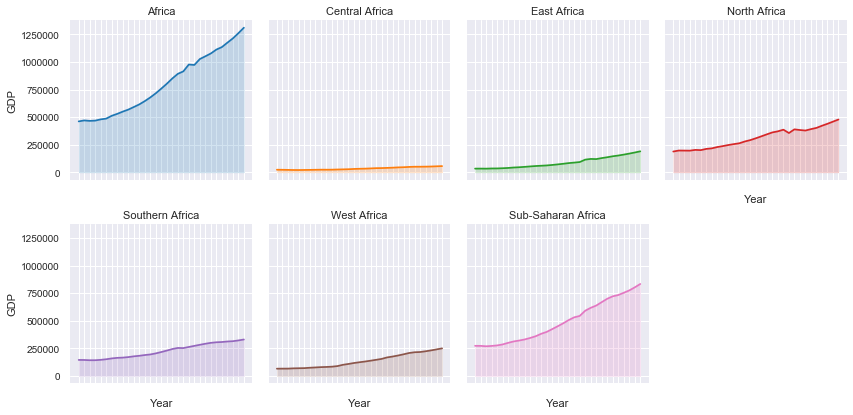

In [98]:
af_gdp = af_melt[af_melt['Indicator Name'] == 'Gross domestic product, (constant prices US$)' ]
afgdp_region = af_gdp.loc[af_gdp['Country Name'].isin(['Africa','North Africa', 'East Africa', \
                                                       'Central Africa', 'West Africa', 'Southern Africa', \
                                                       'Sub-Saharan Africa'])]

sns.set_style('darkgrid')
g = sns.FacetGrid(afgdp_region, col='Country Name', hue='Country Name', col_wrap=4 )
g = g.map(plt.plot, 'Year', 'Value')
g = g.map(plt.fill_between, 'Year', 'Value', alpha=0.2).set_titles("{col_name}")

g.set_ylabels("GDP")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45);

It is interesting that East Africa has the largest populatation but doesn't seem to contribute as much to overall growth. It is however, growing faster in recent years, the slope is much steeper in the last few years than it has been. This seems to be true of Africa in general and most areas. Clearly Central Africa contributes the least and the speed of the growth doesn't seem to have changed much. This may be due to civil unrest in the area. Sub Saharan Africa looks to be out performing North Africa which is also very interesting. 

### Growth by country for 2018 and 2019 predictions 

Now I will drill down to get a sense of growth on a country to country basis. I expect the top 10 to be very strong figures as they make up some of the fastest growing countries in the whole world. 


I also use the 2019 values as a comparison, it is important to note that these are predictions from the world bank. I want to use them to give me a sense of the trajectories of these fast growing countries, is the growth in 2018 an anonoly or is it expected to continue?

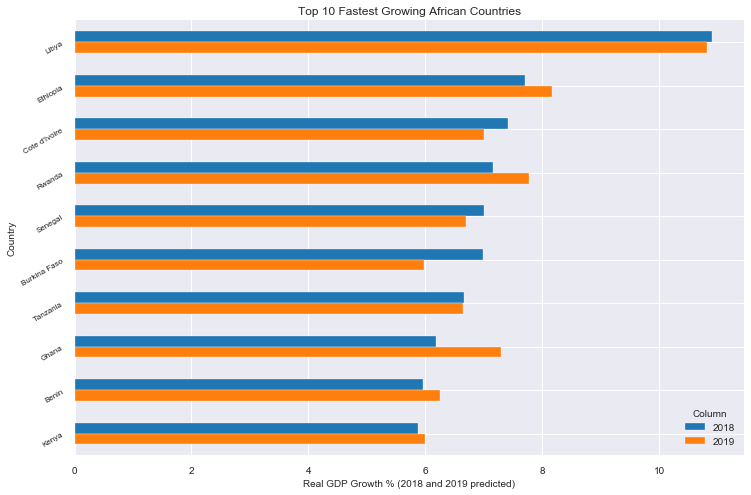

In [99]:
small_af18 = new_af[['Country Name', 'Indicator Name', '2018', '2019']][new_af['Country Name'] != 'Southern Africa']
rate_af18 = small_af18[small_af18['Indicator Name'] == 'Real GDP growth (annual %)' ]

gdp_bar = rate_af18.sort_values(by='2018', ascending = False).head(10).plot(kind = 'barh',
                                                                   x='Country Name', \
                                                                      y= ['2018', '2019'], rot=1, \
                                                                      figsize =(12,8)) 
gdp_bar.invert_yaxis()
plt.xlabel('Real GDP Growth % (2018 and 2019 predicted)', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.yticks(fontsize=8, rotation=30)
plt.title('Top 10 Fastest Growing African Countries')

gdp_bar;


I am a bit surprised to see Libya as the fastest growing country here. This may be the post war recovery and the country may be growing speedily because the initial growth was low. Of course, if you have a low value of GDP to start with, the growth rate will be much faster than the increase in absolute terms. That can be said of a few countries in Africa also. It may also be due to the fact that Libya have restored their crude oil production. We will bear this in mind but focus on the other growing countries. For example, Ethiopia is really leading the charge here. It grew the second fastest in 2018 and that growth is only set to continue it seems. Ethiopia will be worth investigating further.

### Negative Growth and Instability

Now we have reviewed the fastest growing, it is time to look at the other side and see which countries are growing more slowly. Some describe the growth performance of the continent as somewhat disappointing. I want to see if I can investigate why that may be. 

In [100]:
low_growth = rate_af18.sort_values(by='2018', ascending = True) \
                      .head(10)

I wanted now to find a way to take these countries and find the real GDP growth per capita values for them in order to compare the slow growth in gdp with the adjusted value for population growth. I could have done this arguably more easily using my pivot table, however I find it harder to index into countries with that data set. What I do here, is find the bottom 10 slowest growing countries in the dataset, then use those country names in a list to index into another dataset. What I am trying to do is find the per capita growth rates for the bottom 10 slowest growing countries. I will plot and compare the real growth rates with ones adjusted for rises in the population.

In [101]:
list = low_growth['Country Name'].to_numpy()

cap_lowgrowth = small_af18.loc[small_af18['Country Name'].isin(list)] \
[small_af18['Indicator Name'] == 'Real per Capita GDP Growth Rate (annual %)' ]

cap_lowgrowth
stability10 = low_growth.merge(cap_lowgrowth, how='left', on='Country Name', suffixes=('_real','_capita'))
stability10


/Users/Beth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Column,Country Name,Indicator Name_real,2018_real,2019_real,Indicator Name_capita,2018_capita,2019_capita
0,Equatorial Guinea,Real GDP growth (annual %),-7.901889,-2.704625,Real per Capita GDP Growth Rate (annual %),-11.140654,-6.010269
1,South Sudan,Real GDP growth (annual %),-3.815000,-2.590000,Real per Capita GDP Growth Rate (annual %),-6.371229,-5.117432
2,Angola,Real GDP growth (annual %),-0.709417,1.205486,Real per Capita GDP Growth Rate (annual %),-3.903614,-2.020860
3,eSwatini,Real GDP growth (annual %),-0.490103,1.672955,Real per Capita GDP Growth Rate (annual %),-2.215918,-0.053112
4,Namibia,Real GDP growth (annual %),-0.121348,2.762597,Real per Capita GDP Growth Rate (annual %),-2.205799,0.654638
5,South Africa,Real GDP growth (annual %),0.696371,1.707597,Real per Capita GDP Growth Rate (annual %),-0.498799,0.539838
6,Lesotho,Real GDP growth (annual %),0.893832,1.201160,Real per Capita GDP Growth Rate (annual %),-0.429018,-0.108590
7,Burundi,Real GDP growth (annual %),1.411152,0.422758,Real per Capita GDP Growth Rate (annual %),-1.773235,-2.696066
8,Nigeria,Real GDP growth (annual %),1.942723,2.340113,Real per Capita GDP Growth Rate (annual %),-0.653750,-0.250534
9,"Congo, Rep.",Real GDP growth (annual %),1.956685,3.655277,Real per Capita GDP Growth Rate (annual %),-0.670544,0.993814


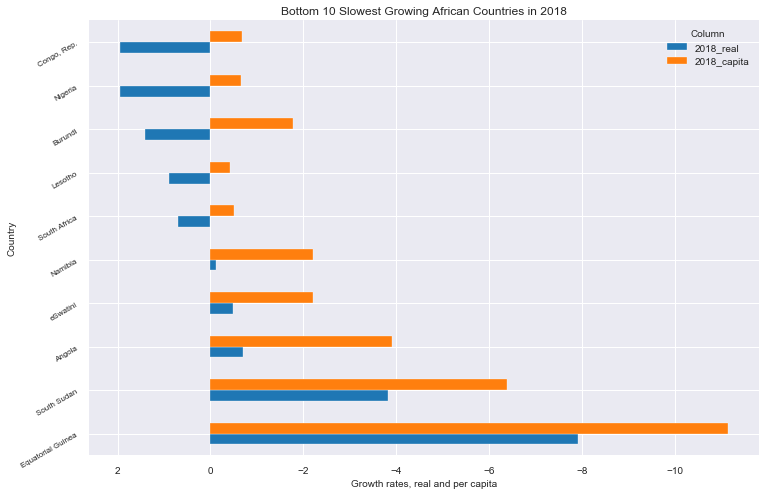

In [102]:
bar_stab = stability10.plot(kind = 'barh', x='Country Name', y= ['2018_real', '2018_capita'], rot=1, \
                                                                      figsize =(12,8)) 
plt.xlabel('Growth rates, real and per capita', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.yticks(fontsize=8, rotation=30)
plt.title('Bottom 10 Slowest Growing African Countries in 2018')

bar_stab.invert_xaxis();

The blue line showing the, mostly, negative growth rates of real GDP and the orange then showing the real growth per capita, so this accounts for changes in population. The result is very interesting, it shows South Africa and Nigeria, two of Africa's largest economies are pulling down it's average growth rate. Nigeria and South Africa together, make up almost half of the whole continents GDP and both economies are contracting. Even though both countries show a positive GDP growth rate, both are below the rate of population growth so are contracting in real per capita terms. You would expect larger economies to have slower growth rates because they have a much higher starting point, but this is more pertinent than just a slower growth rate. 

### Investigating Ethiopia

Here, I choose a particular country and drill down into the detail. I wanted to pick a country that was one of the fastest growing and is expected to still be growing fast in the future. With Libya being a bit of an anomoly, it makes sense to choose Ethiopia. What I am trying to understand, is if the data and the factors that together, make up GDP will give me some insight into the reason why Ethiopia is growing. It may be for example, that population is rising and we expect to therefore see a rise in the consumption level. It may be export lead growth, so we would expect to see exports growing and the current account balance improving. My hypothesis would be export lead growth or an increase in Foreign Direct Investment from China, this would show as a positive balance on the Current Account. 

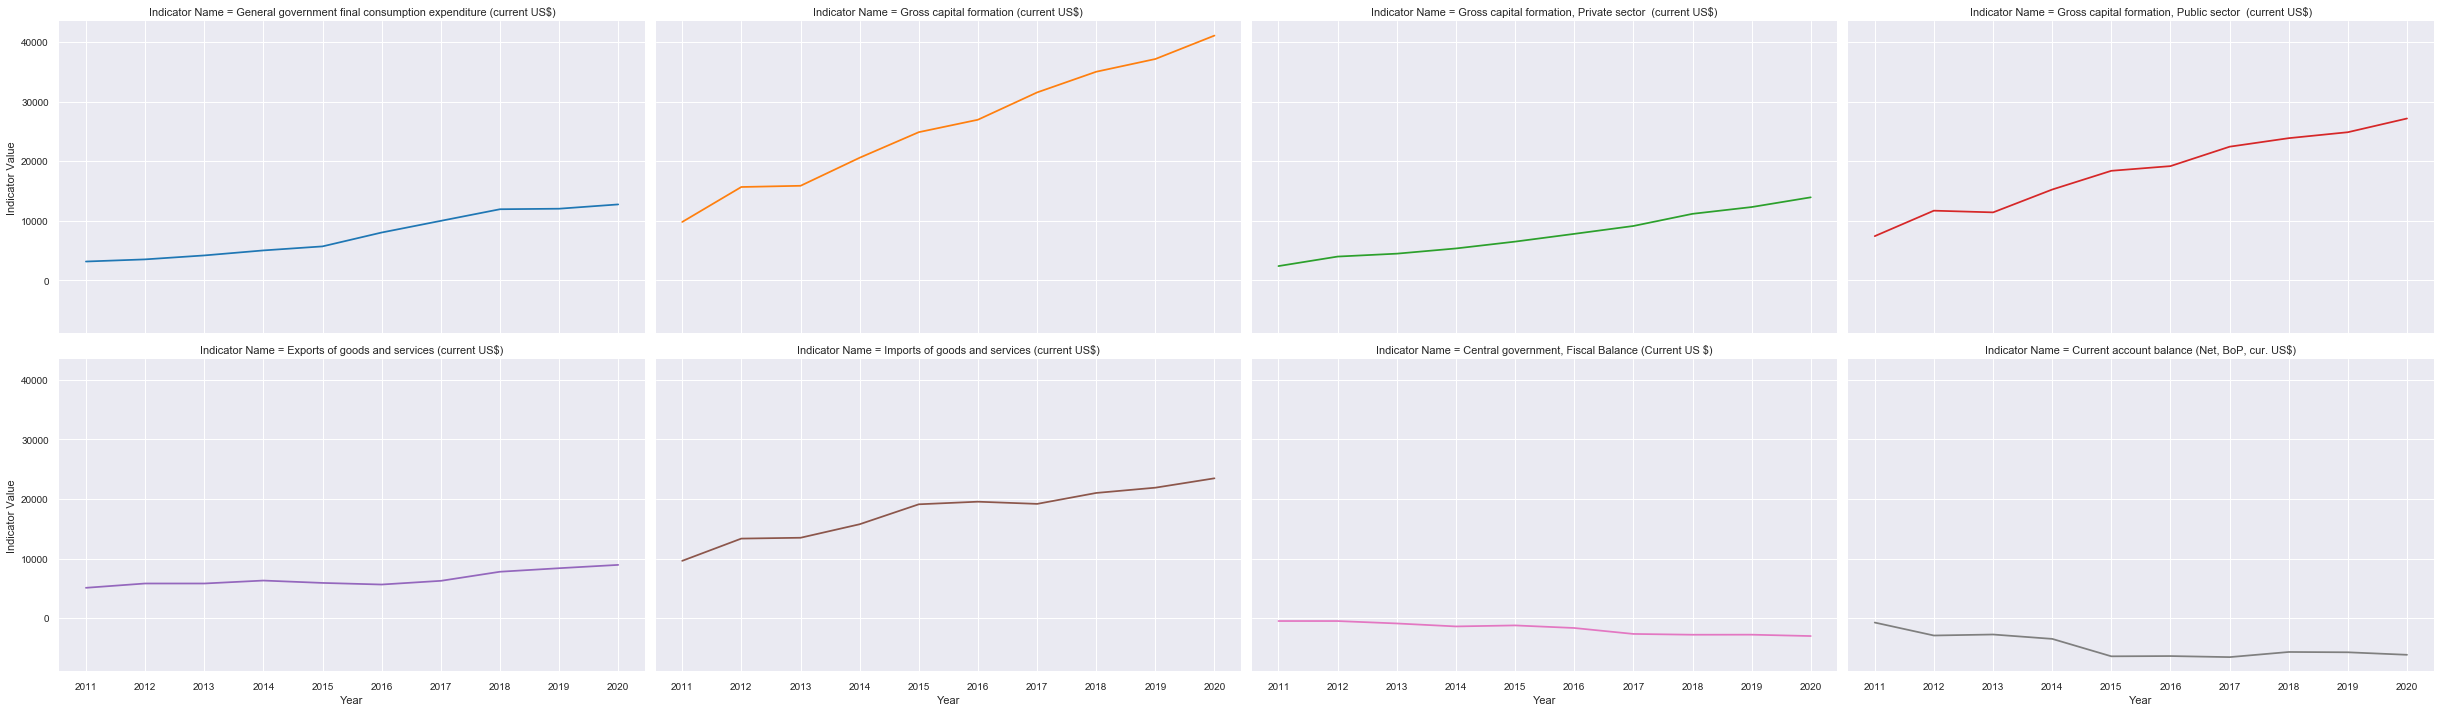

In [103]:
year_col = pd.to_datetime(af_melt['Year'])
af_melt['Year'] = year_col 
Eth = af_melt[(af_melt['Country Name'] == 'Ethiopia') & (af_melt['Year'] > '2010-01-01')]
Eth_indicators = Eth.loc[Eth['Indicator Name'].isin(['Final consumption expenditure (current US$)', 'Gross capital formation (current US$)','General government final consumption expenditure (current US$)', 'Gross capital formation (current US$)', 'Gross capital formation, Private sector  (current US$)', 'Gross capital formation, Public sector  (current US$)', 'Exports of goods and services (current US$)', 'Imports of goods and services (current US$)', 'Central government, Fiscal Balance (Current US $)', 'Current account balance (Net, BoP, cur. US$)'])]
e = sns.FacetGrid(Eth_indicators, col='Indicator Name', hue='Indicator Name', col_wrap=4, height =5, sharey=True, aspect=1.7 )
e = e.map(plt.plot, 'Year', 'Value')
e.set_ylabels("Indicator Value")
e.set_xlabels("Year")

sns.set(font_scale=0.9)

The results here are somewhat different to what I hypothesised. Consumption is steadily increasing which is to be expected but it is not climbing rapidly and is not contributing the most to growth. If we take a look at the current account, which is where any FDI from China would show up, it is actually dropping slightly. Exports are also rising but very slowly, so this isn't responsible for growth either. The current account is likely dropping due to the increase of imports of goods and services. This is actually very common during periods of growth in countries, when incomes rise, people's propensity to purchase imports also rises. Higher income tends to lead to buying more imported goods, so net-net this may be why the current account isn't improving dramatically. The really interesting part here, is the sharp rise in Gross Capital Formation. This is another way to describe the countries investments, the second eleemt that makes up GDP for a country. Investment also, is most noticably rising in the public sector, so Government spending on investment projects which may also account for the rise in Government spending. After some research, it looks to be correct that Ethiopia is growing so fast due to investment in infrastructure and manufacturing. They are currently building the Grand Renaissance Damn which will be the largest on the continent. They are also investing in other infrastructure like roads and rail links which will prove invaluable. This is much more promising for long term growth than something like commodity exports which are vulnerable to external shocks. Investment will also pay dividends for years to come and paves the way for a real powerhouse. 

### Exploring Relationships

I wanted to explore the different relationships between the factors and see if there are any surprises. Here is where our handy Pivot table from before will become very useful. It allows to compare the different indicators and look for correlations. I am less interested in the very obvious relationships - of course there is a correlation between Consumption and GDP, as with Investment or a high level of Exports. If I had more time I would explore which of these factors most strongly correlate with different measures of growth but my current table is only using the year 2018 for simplicity and so, I don't think it would be reliable for that sort of longer term analysis. 

#### Pandas Profiling
I found a very useful tool called Pandas profiling which I demonstrate below with the Pivot table data set. It gave me some useful high level insight in a nice report that I can use for analysis. In my original analysis, I made various different datasets, each with different interesting indicators that may be related, this was easier to read in the report but took some time. Here I will just profile the whole data set for demonstration.

In [104]:
profile = pandas_profiling.ProfileReport(af18_pivot)

profile

Number of variables,31
Number of observations,60
Total Missing (%),0.0%
Total size in memory,14.6 KiB
Average record size in memory,249.3 B
Numeric,17
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,13


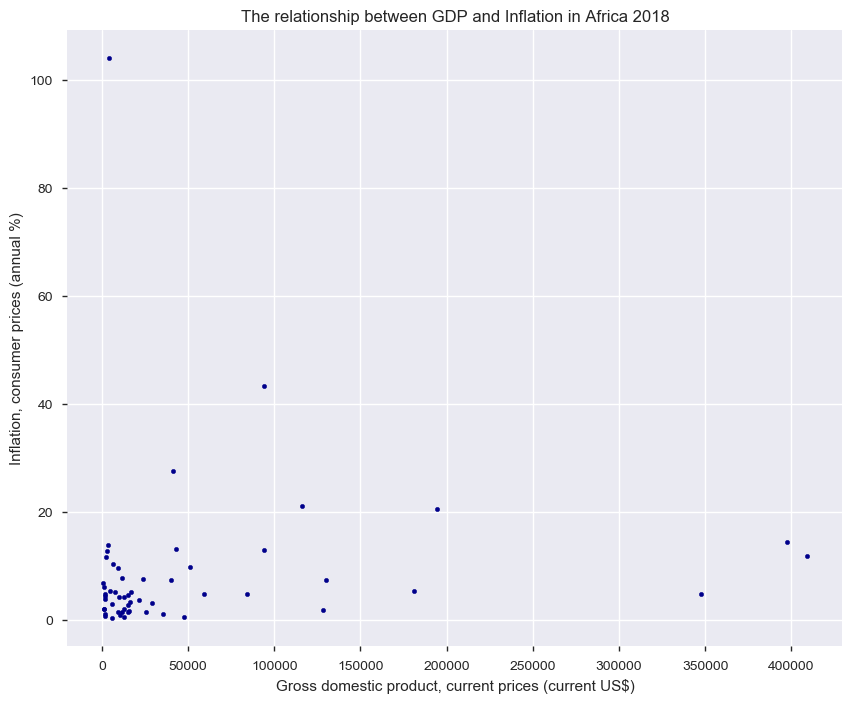

In [105]:
af18_countries = af18_pivot[af18_pivot['Gross domestic product, current prices (current US$)'] <= 500000]
af18_countries.plot(kind='scatter', x='Gross domestic product, current prices (current US$)', \
                                    y='Inflation, consumer prices (annual %)', figsize=(10,8), \
                                    s=10, color='darkblue' )

plt.title('The relationship between GDP and Inflation in Africa 2018');

The relationship between growth or employment and prices/ inflation is one of the most researched relationships in economics so it's an important one to investigate. What we have here is somewhat of a reverse Phillips Curve, although he uses wage inflation and unemployment. The idea being when unemployment is low, there is scarcity of labour and so employers will raise wages to attract scarce labour. This later became general inflation because of the relationship between how much a company pays in wages and how much is charges being fairly close. This relationship was later critisised fairly famously by Milton Friedman but we won't digress too far. Here there is a relationship between inflation and GDP which is fairly common. What is notable is that inflation in general here is very high, for reference the US has a fairly steady 1.7% inflation rate. Some of the larger economies to the right have managed to sustain growth at lower inflation, Nigeria is one of them. So it's not all bad for the larger economies. 



In [106]:
af18_countries [ af18_countries['Inflation, consumer prices (annual %)'] >= 80 ]

,Column,"Central government, Fiscal Balance (% of GDP)","Central government, Fiscal Balance (Current US $)","Central government, total expenditure and net lending (% of GDP)","Central government, total expenditure and net lending (Current US $)","Central government, total revenue and grants (% of GDP)","Central government, total revenue and grants (Current US $)",Current account balance (As % of GDP),"Current account balance (Net, BoP, cur. US$)",Exports of goods and services (% of GDP),Exports of goods and services (current US$),...,"Gross capital formation, Public sector (% GDP)","Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Household final consumption expenditure (% of GDP),Household final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Inflation, consumer prices (annual %)",Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %)
Year,Country Name,,,,,,,,,,,,,,,,,,,,,
2018,South Sudan,-1.466,-58.341822,26.920841,36270.195978,21.932495,28799.35792,-12.65,-503.427043,30.261075,37062.436356,...,8.62584,5759.835572,3979.66042,69.949337,99137.634802,40.794764,42933.99615,104.122,-3.815,-6.371229


South Sudan has a staggeringly high inflation rate. Reuters offers the following insight:


'South Sudan’s economy is close to collapse after a 2015 peace deal with Sudan failed to stick and fighting between rival soldiers has continued. The conflict has hurt the country’s crude oil output, which is at less than half of its pre-war level of 245,000 barrels per day.

“The Bank of South Sudan would like to inform the general public that it is introducing a new banknote of five hundred South Sudanese pounds as legal tender in the Republic of South Sudan,” central bank Governor Dier Tong Ngor said in a statement.' 
[Source](https://www.reuters.com/article/us-southsudan-economy/war-torn-south-sudan-issues-higher-denomination-banknotes-amid-soaring-inflation-idUSKBN1J71BI)


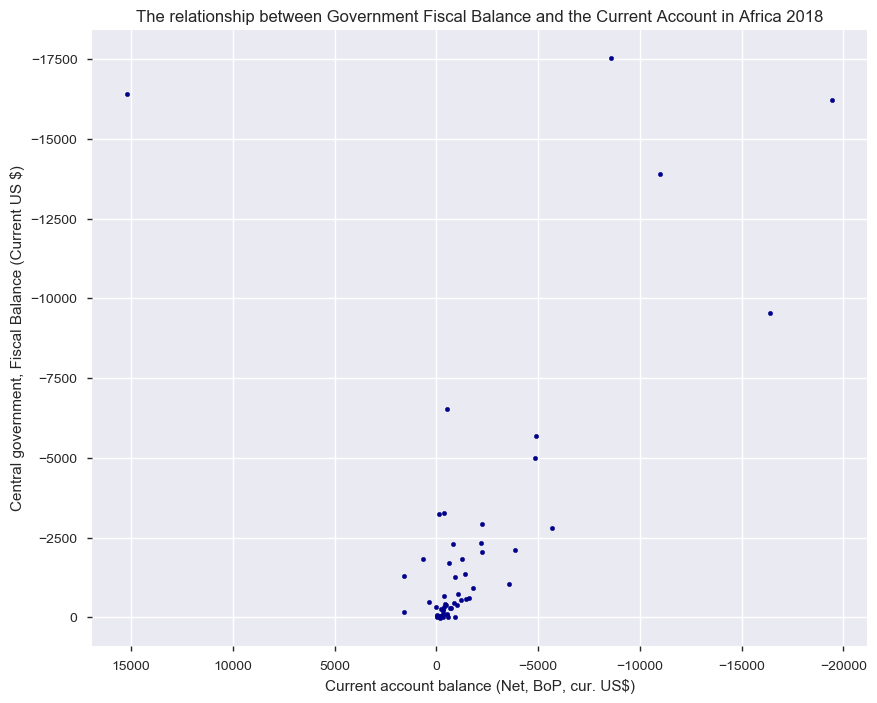

In [107]:
scatt = af18_countries.plot(kind='scatter', x='Current account balance (Net, BoP, cur. US$)', \
                                            y='Central government, Fiscal Balance (Current US $)', \
                                            figsize=(10,8), s=10, color='darkblue' )
plt.title('The relationship between Government Fiscal Balance and the Current Account in Africa 2018')
scatt.invert_yaxis()
scatt.invert_xaxis();

This is a relationship uncovered during Pandas Profiling which I certainly didn't hypothesis or expect. It is a relationship between the Government's Fiscal balance, so spending and revenue and the Current Account which a measure of net exports. 

Some economists believe a large budget deficit is correlated to a large current account deficit. What we have found here is known as the twin deficit hypothesis. The logic behind the theory is government tax cuts, which reduce revenue and increase the deficit, result in increased consumption as taxpayers spend their new-found money. The increased spending reduces the national savings rate, causing the nation to increase the amount it borrows from abroad. I also admit this is the extent of my economic knowledge but I would enjoy investigating further


## <span style="color:blue">Next Steps</span>

I would love to investigate further:

* Unemployment in Africa and South Africa
* Economic Stability for the continent as a whole
* The distribution of Income and Wealth using Gini Coefficients
* The improvement in healthcare and education and other development indicators